In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in metacritic data
df_meta = pd.read_csv('metacritic.csv', header=0)

In [88]:
# preview data
df_meta.head()

# rename columns
df_meta = df_meta.rename(columns={"release_data": "Release_Date", "tittle": "Title", "plataforma": "Platform"})

# scale up userscore (x10) to match metascore scale
df_meta['userscore'] = df_meta['userscore']*10

df_meta.head()

,Release_Date,Title,userscore,metascore,Platform,genre,developer,publisher,rating,Plat_Release_Yr
0,1998-11-23,The Legend of Zelda: Ocarina of Time,91.0,99.0,Nintendo 64,"Action Adventure, ...",Nintendo,...,E,1996
1,2000-09-20,Tony Hawk's Pro Skater 2,74.0,98.0,PlayStation,"Sports, ...",Neversoft Entertainment,...,T,1994
2,2021-03-30,Disco Elysium: The Final Cut,82.0,97.0,PC,"Role-Playing, ...",ZA/UM,...,M,1995
3,2000-10-30,Jet Grind Radio,83.0,94.0,Dreamcast,"Action, ...",Smilebit,...,T,1998
4,2021-08-19,Quake Remastered,84.0,87.0,Switch,"Action, ...","id Software, MachineGames",...,M,2017


In [89]:
# drop first column
df_meta = df_meta.iloc[:,1:]

# data types of columns
print(df_meta.dtypes)

# convert metascore from float to int
#df['metascore'] = df['metascore'].fillna(0).astype('int')


Title               object
userscore          float64
metascore          float64
Platform            object
genre               object
developer           object
publisher           object
rating              object
Plat_Release_Yr     object
dtype: object


In [90]:
# create look-up table of platform and relase date

# using earliest PC game release for the PC release yera
# df_meta[df_meta['Platform'] == 'PC']['Release_Date'].min()

# source: https://en.wikipedia.org/wiki/History_of_video_game_consoles


df_plat_yr = pd.DataFrame({'Platform':df_meta['Platform'].unique(),
                           'Plat_Release_Yr':['1996', '1994', '1995',
                                              '1998', '2017', '2013',
                                              '2000', '2002', '2001',
                                              '2004', '2005', '2006',
                                              '2014', '2006', '2005',
                                              '2011', '2001', '2020', '2011',
                                              '2012', 'na', '2020', '2019']}).dropna()

df_meta = pd.merge(df_meta, df_plat_yr, how = "left", on = ['Platform'])

In [91]:
# average scores by console
avg_scores = df_meta.groupby(['Platform'])[['userscore','metascore']].mean().round(1).sort_values(by="userscore")

# join console release year to average scores table
avg_scores = pd.merge(avg_scores, df_plat_yr, how = "left", on = ['Platform'])

# convert to long form
avg_scores_long = pd.concat([avg_scores.iloc[:,[0,1,3]].rename(columns={"userscore": "score"}), 
                  avg_scores.iloc[:,[0,2,3]].rename(columns={"metascore": "score"})])

# add value for type of score (user or meta)
# list method https://stackoverflow.com/questions/64541504/how-do-i-add-a-column-with-a-repeating-series-of-values-to-a-dataframe
avg_scores_long['Score_Type'] = [i for i in yourlist for _ in range(len(avg_scores))]

<AxesSubplot:xlabel='Plat_Release_Yr', ylabel='score'>

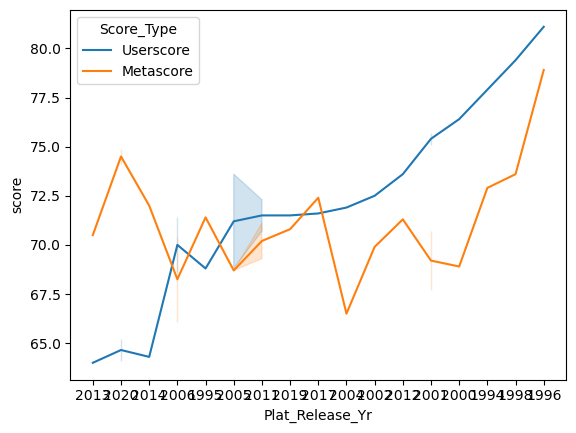

In [92]:
# game scores (user & meta) over time
sns.lineplot(data=avg_scores_long, x="Plat_Release_Yr", y="score", hue="Score_Type")